In [2]:
import sympy as sp

# Define the variables
N, C2, a_i, m = sp.symbols('N C2 a_i m')

# Define the crack length function
crack_length = (a_i**((2-m)/2) + C2 * N)**(2/(2-m))

# Perform the differentiation
derivative = sp.diff(crack_length, N)

In [3]:
derivative

2*C2*(C2*N + a_i**(1 - m/2))**(2/(2 - m))/((2 - m)*(C2*N + a_i**(1 - m/2)))

In [10]:
import sympy as sp
import numpy as np

# Constants and parameters
C = 1e-9
ΔS = 30
a_i = 0.5
m = 3.0
β = 1.0
π = np.pi

# Define the symbols
N = sp.symbols('N')

# Define the function to calculate C2
def calculate_C2(C, β, ΔS, π, m):
    return C * (β * ΔS * np.sqrt(π))**m * (2 - m) / m

# Calculate C2
C2_value = calculate_C2(C, β, ΔS, π, m)

# Define the crack length function
crack_length = (a_i**((2-m)/2) + C2_value * N)**(2/(2-m))

# Calculate the derivative of the crack length function with respect to N
derivative = sp.diff(crack_length, N)

# Solve for N where the derivative is zero
N_value = sp.solve(derivative, N)

N_value


[]

Plots

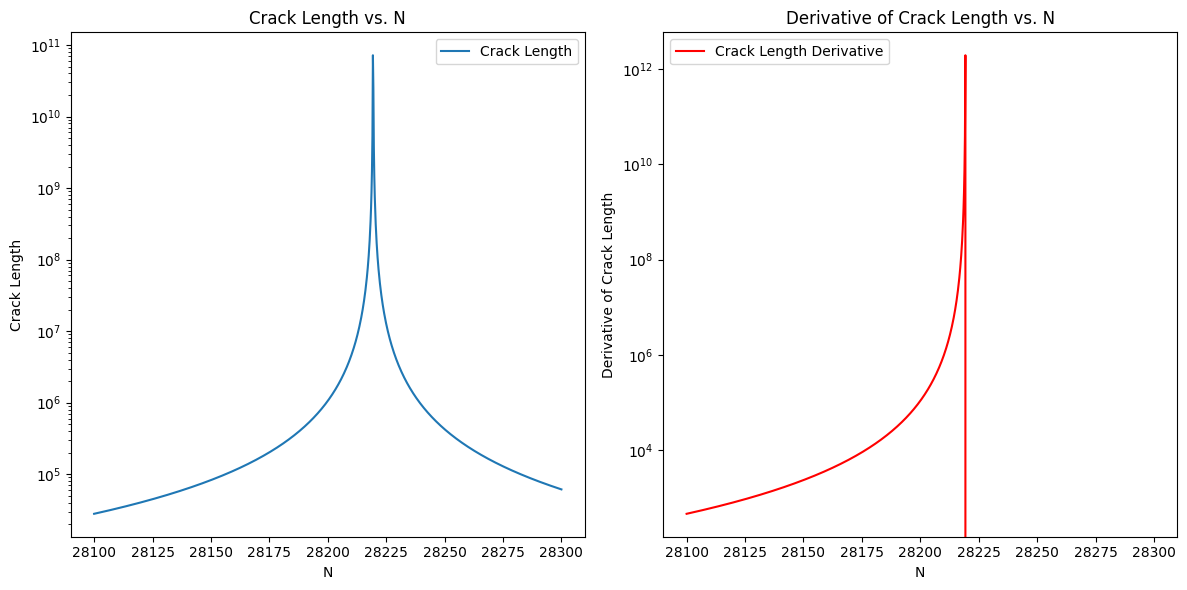

In [25]:
import matplotlib.pyplot as plt

# Convert symbolic expressions to numerical functions for plotting
crack_length_func = sp.lambdify(N, crack_length, modules='numpy')
derivative_func = sp.lambdify(N, derivative, modules='numpy')

# Generate values for N
#N_values = np.linspace(0, 500000, 1000)
N_values = np.linspace(28100, 28300, 1000)

# Calculate corresponding values for crack_length and its derivative
crack_length_values = crack_length_func(N_values)
derivative_values = derivative_func(N_values)

# Plot the crack length function
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(N_values, crack_length_values, label='Crack Length')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Crack Length')
plt.title('Crack Length vs. N')
plt.legend()

# Plot the derivative of the crack length function
plt.subplot(1, 2, 2)
plt.plot(N_values, derivative_values, label='Crack Length Derivative', color='r')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Derivative of Crack Length')
plt.title('Derivative of Crack Length vs. N')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
import sympy as sp
import numpy as np

# Constants and parameters
C = 1e-9
ΔS = 30
a_i = 0.5
m = 3.0
β = 1.0
π = sp.pi

# Define the symbols
N = sp.symbols('N', real=True)

# Define the function to calculate C2
def calculate_C2(C, β, ΔS, π, m):
    return C * (β * ΔS * sp.sqrt(π))**m * (2 - m) / m

# Calculate C2
C2_value = calculate_C2(C, β, ΔS, π, m)

# Define the crack length function
crack_length = (a_i**((2-m)/2) + C2_value * N)**(2/(2-m))

# Calculate the first derivative of the crack length function with respect to N
first_derivative = sp.diff(crack_length, N)

# Calculate the second derivative of the crack length function with respect to N
second_derivative = sp.diff(first_derivative, N)

# Solve for N where the second derivative is zero to find potential maxima and minima
critical_points = sp.solve(second_derivative, N)

# Filter out any complex solutions
real_critical_points = [point.evalf() for point in critical_points if point.is_real]

# Evaluate the first derivative at these critical points to identify the maximum
max_value = None
max_N = None

for point in real_critical_points:
    value = first_derivative.subs(N, point)
    if max_value is None or value > max_value:
        max_value = value
        max_N = point

max_N, max_value

(None, None)

## Numerical Solution to Find Maximum Derivative of Crack Length Function

In this section, we will numerically evaluate the first derivative of the crack length function over a range of \(N\) values to determine the point where the derivative reaches its maximum. This method is useful when a symbolic solution are not available such as in this case

### Steps and Code Explanation:

1. **Define Constants and Parameters:**
   - Constants such as \(C\), \(\Delta S\), initial crack length \(a_i\), \(m\), \(\beta\), and \(\pi\) are set up for the calculations.

2. **Function to Calculate \(C_2\):**
   - A helper function `calculate_C2` is defined to compute \(C_2\) based on the given constants and parameters.

3. **Crack Length Function:**
   - The crack length function `crack_length_func` is defined. This function describes the growth of the crack length as a function of the number of cycles \(N\).

4. **First Derivative of Crack Length Function:**
   - The first derivative of the crack length function is approximated numerically using a small step size \(h\). The function `first_derivative_func` is defined for this purpose.

5. **Generate \(N\) Values:**
   - A range of \(N\) values is generated from 0 to 50,000. This range will be used to evaluate the first derivative function.

6. **Evaluate First Derivative:**
   - The first derivative of the crack length function is evaluated at each \(N\) value within the specified range.

7. **Find Maximum Derivative:**
   - The maximum value of the first derivative and the corresponding \(N\) value are identified using `np.argmax`.

8. **Plotting the Results:**
   - A plot is generated to visualize the first derivative of the crack length function. The point where the maximum derivative occurs is highlighted.


Parameters: m=3.0, ΔS=30, a_i=0.5, C=1e-09
Max Derivative at N = 28028.03 with value = 1.14e+02



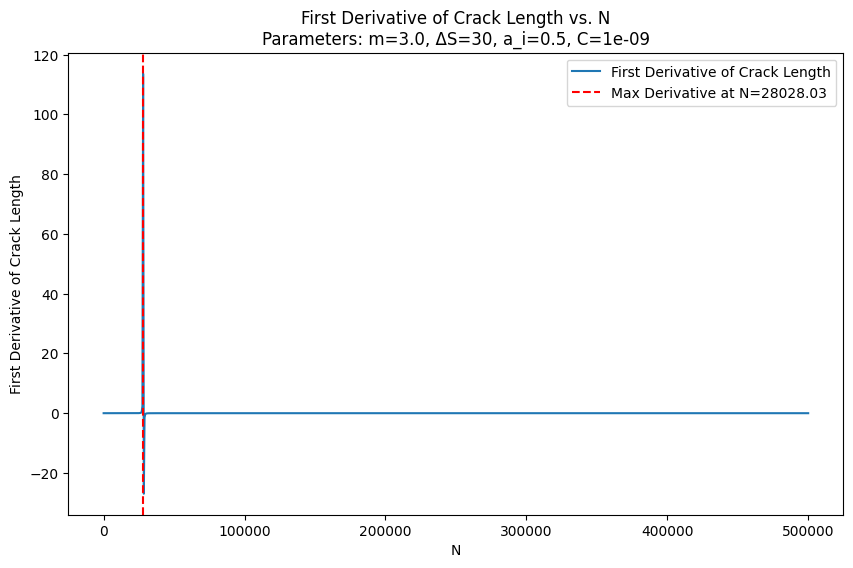

Parameters: m=3.0, ΔS=24, a_i=0.5, C=1e-09
Max Derivative at N = 55055.06 with value = 1.34e+04



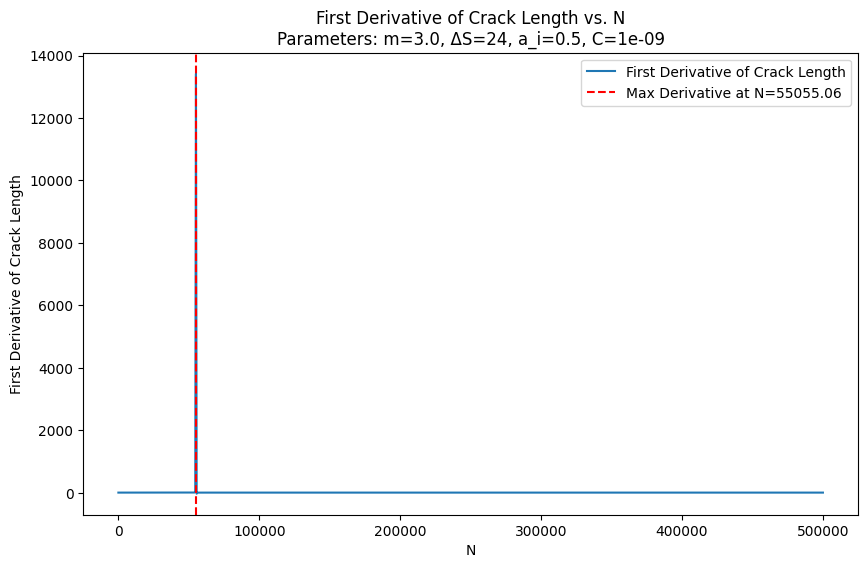

Parameters: m=3.0, ΔS=30, a_i=0.5, C=8e-10
Max Derivative at N = 35035.04 with value = 9.09e+01



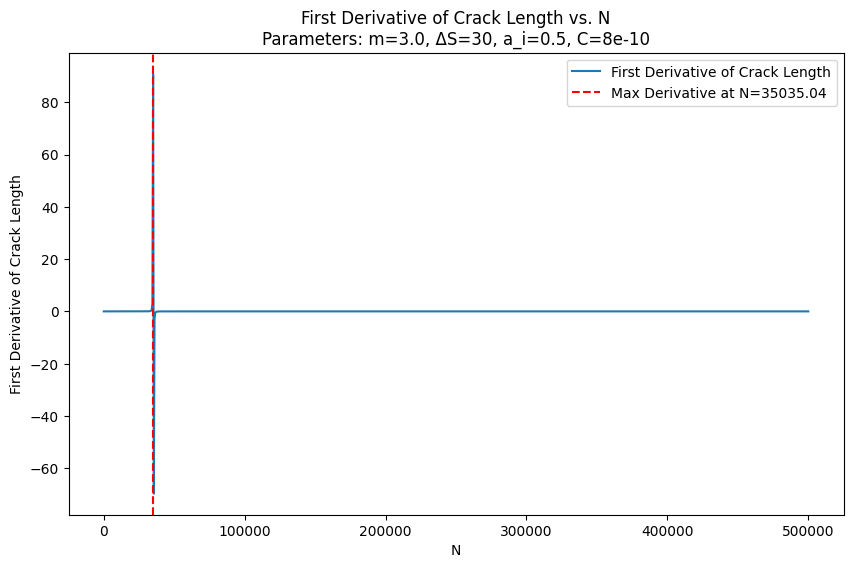

Parameters: m=3.0, ΔS=30, a_i=0.4, C=1e-09
Max Derivative at N = 31531.53 with value = 1.22e+05



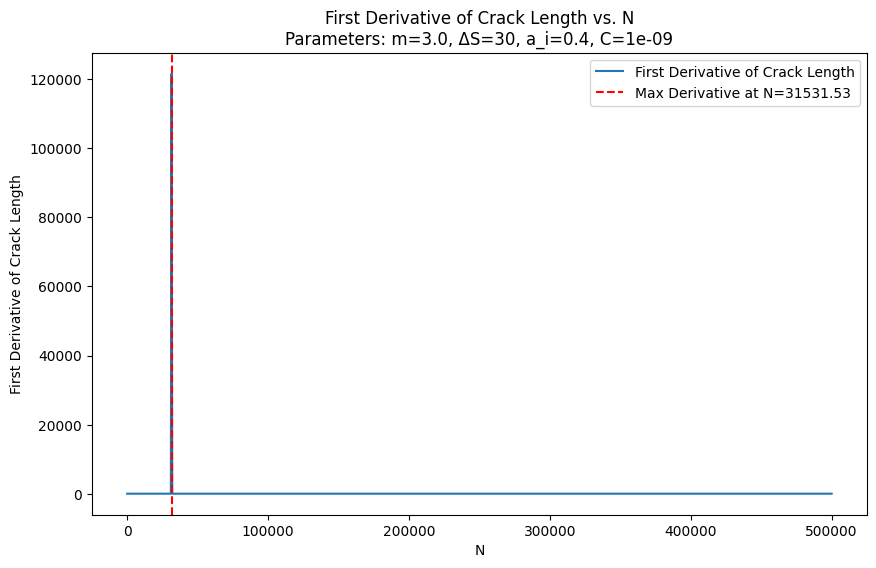

<ipython-input-29-ec3ca63273f7>:10: RuntimeWarning: invalid value encountered in scalar power
  return (a_i**((2-m)/2) + C2_value * N)**(2/(2-m))


Parameters: m=2.4, ΔS=30, a_i=0.5, C=1e-09
Max Derivative at N = 497497.50 with value = nan



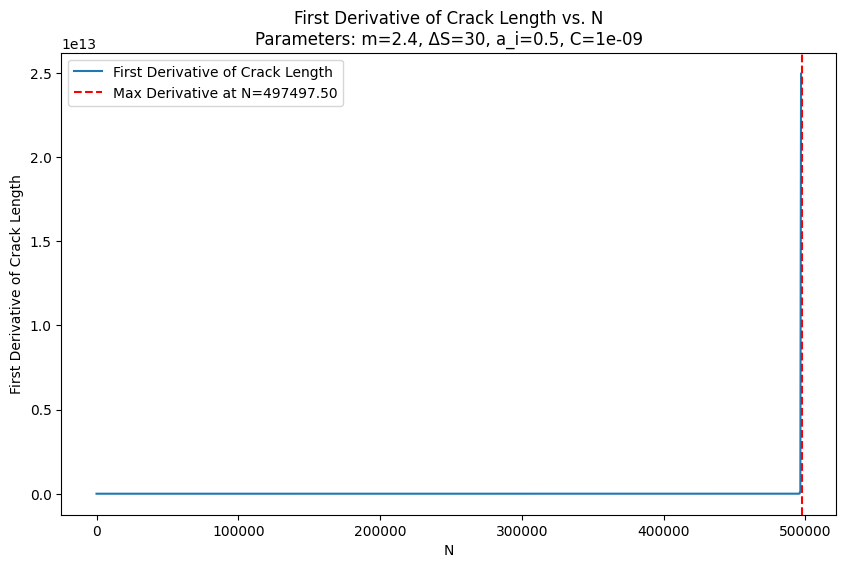

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate C2
def calculate_C2(C, β, ΔS, π, m):
    return C * (β * ΔS * np.sqrt(π))**m * (2 - m) / m

# Define the crack length function
def crack_length_func(N, C2_value, a_i, m):
    return (a_i**((2-m)/2) + C2_value * N)**(2/(2-m))

# Define the first derivative of the crack length function
def first_derivative_func(N, C2_value, a_i, m):
    h = 1e-5  # Small step for numerical differentiation
    return (crack_length_func(N + h, C2_value, a_i, m) - crack_length_func(N, C2_value, a_i, m)) / h

# List of parameter sets
parameter_sets = [
    {'m': 3.0, 'ΔS': 30, 'a_i': 0.5, 'C': 1e-9},
    {'m': 3.0, 'ΔS': 24, 'a_i': 0.5, 'C': 1e-9},
    {'m': 3.0, 'ΔS': 30, 'a_i': 0.5, 'C': 0.8e-9},
    {'m': 3.0, 'ΔS': 30, 'a_i': 0.4, 'C': 1e-9},
    {'m': 2.4, 'ΔS': 30, 'a_i': 0.5, 'C': 1e-9},
]

# Generate values for N
N_values = np.linspace(0, 500000, 1000)

# Iterate through each parameter set
for params in parameter_sets:
    m = params['m']
    ΔS = params['ΔS']
    a_i = params['a_i']
    C = params['C']
    β = 1.0
    π = np.pi

    # Calculate C2
    C2_value = calculate_C2(C, β, ΔS, π, m)

    # Calculate corresponding values for the first derivative of crack_length
    first_derivative_values = [first_derivative_func(N, C2_value, a_i, m) for N in N_values]

    # Find the maximum value of the first derivative and the corresponding N value
    max_index = np.argmax(first_derivative_values)
    max_N = N_values[max_index]
    max_value = first_derivative_values[max_index]

    print(f"Parameters: m={m}, ΔS={ΔS}, a_i={a_i}, C={C}")
    print(f"Max Derivative at N = {max_N:.2f} with value = {max_value:.2e}\n")

    # Optional: Plot the first derivative of the crack length function
    plt.figure(figsize=(10, 6))
    plt.plot(N_values, first_derivative_values, label='First Derivative of Crack Length')
    plt.axvline(x=max_N, color='r', linestyle='--', label=f'Max Derivative at N={max_N:.2f}')
    plt.xlabel('N')
    plt.ylabel('First Derivative of Crack Length')
    plt.title(f'First Derivative of Crack Length vs. N\nParameters: m={m}, ΔS={ΔS}, a_i={a_i}, C={C}')
    plt.legend()
    plt.show()